In [20]:
original_price=[1,5,8,9,10,17,17,20,24,30,33]
len(original_price)

11

In [21]:
list(enumerate(original_price))

[(0, 1),
 (1, 5),
 (2, 8),
 (3, 9),
 (4, 10),
 (5, 17),
 (6, 17),
 (7, 20),
 (8, 24),
 (9, 30),
 (10, 33)]

In [22]:
from collections import defaultdict
price = defaultdict(int)

In [23]:
price

defaultdict(int, {})

In [24]:
# price={i+1:p for i,p in enumerate(original_price)}  

In [29]:
for i,p in enumerate(original_price):
    price[i+1]=p

In [30]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 33})

In [31]:
type(price)

collections.defaultdict

In [32]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
test=[(1,2),(-1,3),(2,1)]
i,j=max(test,key=lambda x: x[1])
print(i,j)

-1 3


In [34]:
def memo(func):
    cache={}
    def wrapper(n):
        if n in cache:
            result = cache[n]
        else:
            result=func(n)
            cache[n]=result
        return result
    return wrapper
            
        

In [35]:
solution={}

In [36]:
# @memo
def r(n):
    candidates = []

    for i in range(1, n):
        candidates.append( (r(i) + r(n - i), i) )
    
    candidates.append( (price[n], 0) )
    
    max_price, split_point  = max(candidates,key=lambda x: x[0])
    
    global solution
    solution[n]=(split_point,n-split_point)
    
    return max_price

In [37]:
type(price)

collections.defaultdict

In [38]:
r(15)

43

In [107]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11)}

In [ ]:
#第二段代码

In [58]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [59]:
import re
test_string = "{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},"
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]") 
pattern.findall(test_string)

[('乌鲁木齐', '87.68', '43.77')]

In [60]:
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    print(city_info)
    if not city_info: continue
        
    city_name, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city_name] = [long, lat]

[]
[('兰州', '103.73', '36.03')]
[('嘉峪关', '98.17', '39.47')]
[('西宁', '101.74', '36.56')]
[('成都', '104.06', '30.67')]
[('石家庄', '114.48', '38.03')]
[('拉萨', '102.73', '25.04')]
[('贵阳', '106.71', '26.57')]
[('武汉', '114.31', '30.52')]
[('郑州', '113.65', '34.76')]
[('济南', '117', '36.65')]
[('南京', '118.78', '32.04')]
[('合肥', '117.27', '31.86')]
[('杭州', '120.19', '30.26')]
[('南昌', '115.89', '28.68')]
[('福州', '119.3', '26.08')]
[('广州', '113.23', '23.16')]
[('长沙', '113', '28.21')]
[('海口', '110.35', '20.02')]
[('沈阳', '123.38', '41.8')]
[('长春', '125.35', '43.88')]
[('哈尔滨', '126.63', '45.75')]
[('太原', '112.53', '37.87')]
[('西安', '108.95', '34.27')]
[('台湾', '121.30', '25.03')]
[('北京', '116.46', '39.92')]
[('上海', '121.48', '31.22')]
[('重庆', '106.54', '29.59')]
[('天津', '117.2', '39.13')]
[('呼和浩特', '111.65', '40.82')]
[('南宁', '108.33', '22.84')]
[('西藏', '91.11', '29.97')]
[('银川', '106.27', '38.47')]
[('乌鲁木齐', '87.68', '43.77')]
[('香港', '114.17', '22.28')]
[('澳门', '113.54', '22.19')]
[]


In [61]:
city_info

[]

In [62]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [63]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [64]:
import math
geo_distance(city_location['上海'], city_location['杭州'])

163.0760821403945

In [65]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = 'FangSong'
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

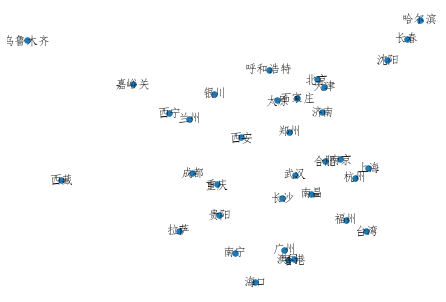

In [66]:
import networkx as nx
city_graph=nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [67]:
all_x,all_y=[],[]
for k ,v in city_location.items():
    x,y=v
    all_x.append(x)
    all_y.append(y)

In [70]:
import numpy as np
Xs=np.array(list(city_location.values()))

In [71]:
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

In [72]:
all_x=Xs[:,0]
all_x

array([103.73,  98.17, 101.74, 104.06, 114.48, 102.73, 106.71, 114.31,
       113.65, 117.  , 118.78, 117.27, 120.19, 115.89, 119.3 , 113.23,
       113.  , 110.35, 123.38, 125.35, 126.63, 112.53, 108.95, 121.3 ,
       116.46, 121.48, 106.54, 117.2 , 111.65, 108.33,  91.11, 106.27,
        87.68, 114.17, 113.54])

In [90]:
all_y=Xs[:,1]
all_y

array([36.03, 39.47, 36.56, 30.67, 38.03, 25.04, 26.57, 30.52, 34.76,
       36.65, 32.04, 31.86, 30.26, 28.68, 26.08, 23.16, 28.21, 20.02,
       41.8 , 43.88, 45.75, 37.87, 34.27, 25.03, 39.92, 31.22, 29.59,
       39.13, 40.82, 22.84, 29.97, 38.47, 43.77, 22.28, 22.19])

In [91]:
import random
def get_random_ceneter(all_x, all_y):
    return (random.uniform(min(all_x),max(all_x)),random.uniform(min(all_y),max(all_y)))

In [92]:
get_random_ceneter(all_x, all_y)

(107.64432452170678, 42.9092934063339)

In [93]:
k=5
centers={i+1:get_random_ceneter(all_x, all_y) for i in range(k)}

In [94]:
centers

{1: (103.14479337257637, 28.993783012384814),
 2: (94.58055477882294, 33.12844375300847),
 3: (126.00823199236062, 44.959344953861994),
 4: (111.71889053874193, 32.40495061505627),
 5: (88.0424775119573, 37.767724809016855)}

In [95]:
list(zip(all_x,all_y))

[(103.73, 36.03),
 (98.17, 39.47),
 (101.74, 36.56),
 (104.06, 30.67),
 (114.48, 38.03),
 (102.73, 25.04),
 (106.71, 26.57),
 (114.31, 30.52),
 (113.65, 34.76),
 (117.0, 36.65),
 (118.78, 32.04),
 (117.27, 31.86),
 (120.19, 30.26),
 (115.89, 28.68),
 (119.3, 26.08),
 (113.23, 23.16),
 (113.0, 28.21),
 (110.35, 20.02),
 (123.38, 41.8),
 (125.35, 43.88),
 (126.63, 45.75),
 (112.53, 37.87),
 (108.95, 34.27),
 (121.3, 25.03),
 (116.46, 39.92),
 (121.48, 31.22),
 (106.54, 29.59),
 (117.2, 39.13),
 (111.65, 40.82),
 (108.33, 22.84),
 (91.11, 29.97),
 (106.27, 38.47),
 (87.68, 43.77),
 (114.17, 22.28),
 (113.54, 22.19)]

In [96]:
for k in centers:
    print(centers[k])

(103.14479337257637, 28.993783012384814)
(94.58055477882294, 33.12844375300847)
(126.00823199236062, 44.959344953861994)
(111.71889053874193, 32.40495061505627)
(88.0424775119573, 37.767724809016855)


In [97]:
from collections import defaultdict
closet_points=defaultdict(list)

# for x, y in zip(all_x, all_y):
#     xx=[(k, geo_distance((x, y), centers[k])) for k in centers]
#     print(xx)
#     closet_c, closet_dis = min(xx, key=lambda t:t[1])
#     print(closet_c, closet_dis)
#     closet_points[closet_c].append([x, y])


In [98]:
closet_points

defaultdict(list, {})

In [99]:
changed = True
threshold=3
while changed:
    closet_points = defaultdict(list)

    for x, y in zip(all_x, all_y):
        closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t:t[1])
        closet_points[closet_c].append([x, y])

    changed = False
    
    for c in closet_points:
        former_center = centers[c] 

        neigbors_belong_to_c = closet_points[c]

        neighbors_center = np.mean(neigbors_belong_to_c, axis=0)

        if geo_distance(neighbors_center, former_center) > threshold:
            print('Updated: {} center'.format(c))
            centers[c] = neighbors_center # 赋值新的中心点
            changed = True

Updated: 1 center
Updated: 2 center
Updated: 4 center
Updated: 3 center
Updated: 5 center
Updated: 2 center
Updated: 1 center
Updated: 4 center
Updated: 3 center
Updated: 2 center
Updated: 4 center
Updated: 1 center
Updated: 3 center
Updated: 3 center
Updated: 4 center
Updated: 2 center
Updated: 3 center
Updated: 1 center
Updated: 4 center


In [100]:
centers

{1: array([109.45   ,  23.96125]),
 2: array([102.00428571,  35.06285714]),
 3: array([118.29777778,  40.42777778]),
 4: array([117.517,  29.866]),
 5: array([87.68, 43.77])}

In [101]:
print(*[all_x, all_y])

[103.73  98.17 101.74 104.06 114.48 102.73 106.71 114.31 113.65 117.
 118.78 117.27 120.19 115.89 119.3  113.23 113.   110.35 123.38 125.35
 126.63 112.53 108.95 121.3  116.46 121.48 106.54 117.2  111.65 108.33
  91.11 106.27  87.68 114.17 113.54] [36.03 39.47 36.56 30.67 38.03 25.04 26.57 30.52 34.76 36.65 32.04 31.86
 30.26 28.68 26.08 23.16 28.21 20.02 41.8  43.88 45.75 37.87 34.27 25.03
 39.92 31.22 29.59 39.13 40.82 22.84 29.97 38.47 43.77 22.28 22.19]


In [102]:
yy=*[all_x, all_y]

SyntaxError: can't use starred expression here (<ipython-input-102-f97af9e33490>, line 1)

###这里 *[all_x, all_y]的用法是啥子？

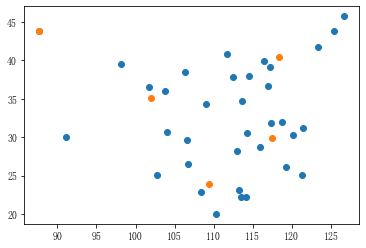

In [103]:
import matplotlib.pyplot as plt
plt.scatter(*[all_x, all_y])
plt.scatter(*zip(*centers.values()))

In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xs)

In [107]:
def draw_cities(cities, color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph, cities, node_color=color, with_labels=True, node_size=50)

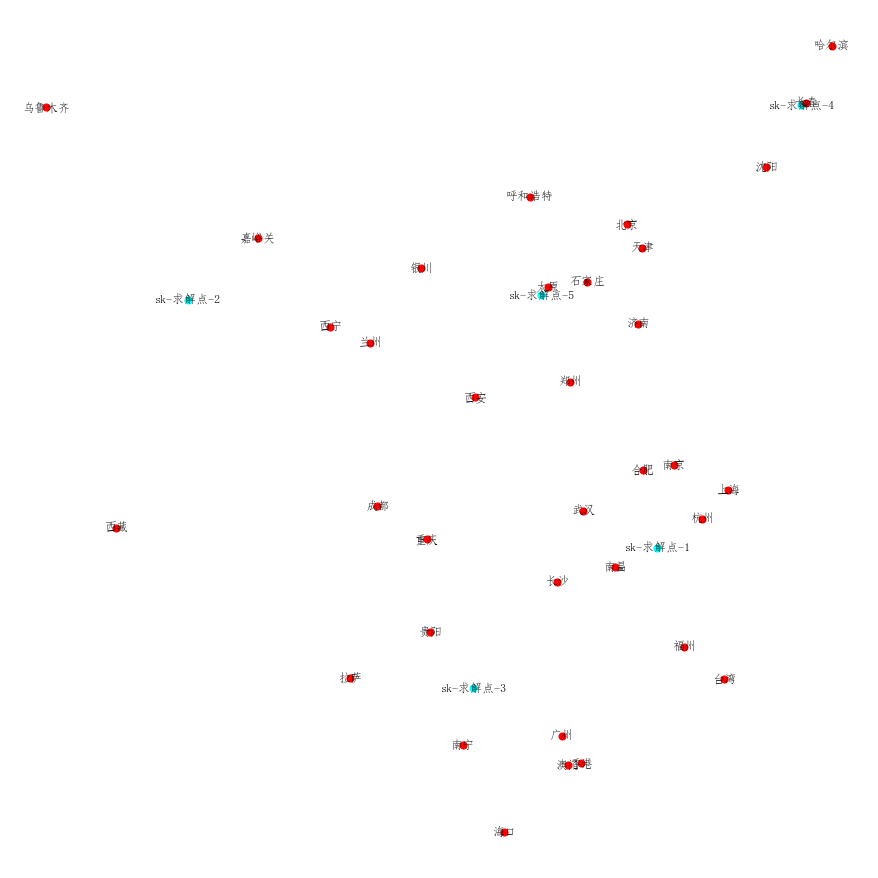

In [109]:
plt.figure(1, figsize=(12, 12))
# draw_cities({'初始点-{}'.format(int(i)+1): p for i, p in the_first_center.items()}, color='yellow')
draw_cities({'sk-求解点-{}'.format(int(i)+1): p for i, p in enumerate(kmeans.cluster_centers_)}, color='cyan')
# draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')